<a href="https://colab.research.google.com/github/jessicacui99/Covid-forecast/blob/master/Covid_days_to_peak_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sl
import matplotlib.pyplot as plt
import time
import tensorflow as tf
import seaborn as sns
import plotly.express as px



from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
%matplotlib inline

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-j0u1yzi2
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-j0u1yzi2
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.04c42ce20a2fbc4b0aad83bfa86ba776b05826847_-cp36-none-any.whl size=119801 sha256=6b0e696bb0ee7df5c8d5c52bbb79df608299fb822af25e74c5f1947e4d90795b
  Stored in directory: /tmp/pip-ephem-wheel-cache-442fuqol/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
transport = pd.read_csv("/content/international-travel-covid.csv")
travel = pd.read_csv("/content/public-transport-covid.csv")

In [ ]:
raw_data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [ ]:
test = raw_data.loc[raw_data.total_tests.isna() == False]
test = test[["location", "iso_code", "date", "new_tests_per_thousand"]]
test = test.rename(columns={"location":"Entity", "new_tests_per_thousand": "New tests per thousand"})

In [ ]:
transport = transport.drop_duplicates("Entity", keep= "last")
travel = travel.drop_duplicates("Entity", keep = "last")
test_df = pd.DataFrame()
for i in test.Entity.unique():
  test_num = test[test["Entity"] == i]["New tests per thousand"].mean()
  temp = pd.DataFrame([pd.Series([i, test_num])])
  test_df = pd.concat([test_df, temp])
test_df.columns =["location", "tests"]

In [ ]:
data = raw_data.drop_duplicates("location", keep = "last")
data = data.merge(transport[["Entity", "International travel controls (OxBSG)"]], how="outer", left_on="location", right_on = "Entity")
data = data.merge(travel[["Entity","Close public transport (OxBSG)"]], how = "outer",left_on="location", right_on = "Entity")
data = data.merge(test_df, how = "outer",left_on="location", right_on = "location")
data = data.rename(columns ={"International travel controls (OxBSG)": "travel", 
                      "Close public transport (OxBSG)": "transport"})

In [ ]:
country = raw_data.location.unique()

In [ ]:
df.iloc[110:130,:]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,rolling_new_cases
13494,JPN,Asia,Japan,2020-04-19,10361.0,566.0,161.0,7.0,81.920,4.475,1.273,0.055,112816.0,1285.0,0.892,0.010,5062.0,0.040,people tested,47.22,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,3.914333
13495,JPN,Asia,Japan,2020-04-20,10751.0,390.0,171.0,10.0,85.004,3.084,1.352,0.079,116725.0,3909.0,0.923,0.031,5432.0,0.043,people tested,47.22,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,3.942800
13496,JPN,Asia,Japan,2020-04-21,11118.0,367.0,186.0,15.0,87.906,2.902,1.471,0.119,124550.0,7825.0,0.985,0.062,5000.0,0.040,people tested,47.22,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,3.934400
13497,JPN,Asia,Japan,2020-04-22,11496.0,378.0,186.0,0.0,90.894,2.989,1.471,0.000,130587.0,6037.0,1.033,0.048,5193.0,0.041,people tested,47.22,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,4.047733
13498,JPN,Asia,Japan,2020-04-23,11772.0,276.0,287.0,101.0,93.077,2.182,2.269,0.799,135983.0,5396.0,1.075,0.043,5040.0,0.040,people tested,47.22,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,4.146267
13499,JPN,Asia,Japan,2020-04-24,12240.0,468.0,317.0,30.0,96.777,3.700,2.506,0.237,141600.0,5617.0,1.120,0.044,5033.0,0.040,people tested,47.22,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,4.207933
13500,JPN,Asia,Japan,2020-04-25,12892.0,652.0,334.0,17.0,101.932,5.155,2.641,0.134,147454.0,5854.0,1.166,0.046,5132.0,0.041,people tested,47.22,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,4.335467
13501,JPN,Asia,Japan,2020-04-26,13182.0,290.0,348.0,14.0,104.225,2.293,2.752,0.111,149074.0,1620.0,1.179,0.013,5180.0,0.041,people tested,47.22,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,4.129933
13502,JPN,Asia,Japan,2020-04-27,13385.0,203.0,351.0,3.0,105.830,1.605,2.775,0.024,150692.0,1618.0,1.191,0.013,4852.0,0.038,people tested,47.22,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,3.498467
13503,JPN,Asia,Japan,2020-04-28,13576.0,191.0,376.0,25.0,107.340,1.510,2.973,0.198,160546.0,9854.0,1.269,0.078,5142.0,0.041,people tested,47.22,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,3.331867


In [ ]:
pass_peak_dict = {}
growing_dict = {}
df = raw_data[raw_data["location"] == "Japan"]
df["rolling_new_cases"] = df.loc[:,"new_cases_per_million"].rolling(15).mean().fillna(0)
max_daily_case = max(df["rolling_new_cases"])
max_total_case = max(df["total_cases"])
total_case_per_million = max(df["total_cases_per_million"])
if max_total_case > 1000 and total_case_per_million > 50:
  start_idx = df.index[df["total_cases_per_million"] > 100].tolist()[0]
  peak_idx = df.index[df['rolling_new_cases'] == max_daily_case].tolist()[0]
  today_index = df.index[df['date'] == "2020-07-02"].tolist()[0]
if df.loc[peak_idx, "date"] < "2020-07-01" and df.loc[peak_idx, "new_cases_per_million"] > 1.2*df.loc[today_index, "rolling_new_cases"]:
  #pass_peak_dict["Jordan"] = peak_idx - start_idx
  print(peak_idx, start_idx)
#elif df.loc[peak_idx, "new_cases_per_million"] < 1.2*df.loc[today_index, "rolling_new_cases"]:
  # growing_dict[i] = "2020-07-02"
else:
  growing_dict[i] = df.loc[start_idx,"date"]

13500 13500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pass_peak_dict = {}
growing_dict = {}
for i in country:
  df = raw_data[raw_data["location"] == i]
  df["rolling_new_cases"] = df.loc[:,"new_cases_per_million"].rolling(5).mean().fillna(0)
  max_daily_case = max(df["rolling_new_cases"])
  max_total_case = max(df["total_cases"])
  total_case_per_million = max(df["total_cases_per_million"])
  if max_total_case > 1000 and total_case_per_million > 50:
    start_idx = df.index[df["total_cases_per_million"] > 50].tolist()[0]
    peak_idx = df.index[df['rolling_new_cases'] == max_daily_case].tolist()[0]
    if df.loc[peak_idx, "date"] < "2020-07-04" and peak_idx > start_idx:
      pass_peak_dict[i] = peak_idx - start_idx
    #elif df.loc[peak_idx, "new_cases_per_million"] < 1.2*df.loc[today_index, "rolling_new_cases"]:
     # growing_dict[i] = "2020-07-02"
    else:
      growing_dict[i] = df.loc[start_idx,"date"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
growing_dict

{'Albania': '2020-03-26',
 'Algeria': '2020-04-17',
 'Argentina': '2020-04-14',
 'Bolivia': '2020-04-21',
 'Bosnia and Herzegovina': '2020-03-26',
 'Brazil': '2020-04-06',
 'Bulgaria': '2020-03-31',
 'Cape Verde': '2020-04-16',
 'China': '2020-02-18',
 'Congo': '2020-05-09',
 'Costa Rica': '2020-03-28',
 'Dominican Republic': '2020-03-28',
 'El Salvador': '2020-04-29',
 'Ethiopia': '2020-06-30',
 'Guatemala': '2020-05-09',
 'Honduras': '2020-04-22',
 'India': '2020-05-12',
 'Indonesia': '2020-05-11',
 'Iraq': '2020-05-01',
 'Israel': '2020-03-19',
 'Jordan': '2020-05-10',
 'Kyrgyzstan': '2020-04-11',
 'Madagascar': '2020-06-19',
 'Malawi': '2020-06-26',
 'Mexico': '2020-04-18',
 'Nicaragua': '2020-05-27',
 'Palestine': '2020-04-08',
 'Philippines': '2020-04-17',
 'Romania': '2020-03-27',
 'United States': '2020-03-21',
 'Uzbekistan': '2020-04-22',
 'Venezuela': '2020-05-31',
 'World': '2020-03-24',
 'Zambia': '2020-05-23'}

In [ ]:
pass_peak_dict

{'Afghanistan': 39,
 'Armenia': 98,
 'Australia': 4,
 'Austria': 14,
 'Azerbaijan': 81,
 'Bahrain': 109,
 'Belarus': 42,
 'Belgium': 31,
 'Benin': 6,
 'Cameroon': 60,
 'Canada': 40,
 'Central African Republic': 24,
 'Chile': 84,
 "Cote d'Ivoire": 53,
 'Croatia': 11,
 'Cuba': 10,
 'Cyprus': 17,
 'Czech Republic': 16,
 'Democratic Republic of Congo': 18,
 'Denmark': 27,
 'Djibouti': 60,
 'Ecuador': 38,
 'Egypt': 61,
 'Equatorial Guinea': 76,
 'Estonia': 23,
 'Finland': 22,
 'France': 21,
 'Gabon': 60,
 'Germany': 20,
 'Ghana': 61,
 'Greece': 14,
 'Guinea': 9,
 'Guinea-Bissau': 4,
 'Haiti': 14,
 'Iceland': 24,
 'Iran': 91,
 'Ireland': 29,
 'Italy': 24,
 'Japan': 3,
 'Kosovo': 82,
 'Kuwait': 55,
 'Lebanon': 57,
 'Lithuania': 12,
 'Luxembourg': 14,
 'Macedonia': 90,
 'Malaysia': 12,
 'Maldives': 45,
 'Mali': 21,
 'Mauritania': 31,
 'Moldova': 84,
 'Nepal': 28,
 'Netherlands': 29,
 'New Zealand': 5,
 'Nigeria': 27,
 'Norway': 19,
 'Oman': 83,
 'Pakistan': 51,
 'Poland': 70,
 'Puerto Rico': 6

In [ ]:
days = pd.DataFrame.from_dict(pass_peak_dict, orient='index')
slowing_lst = days.index.to_list()

growing_start = pd.DataFrame.from_dict(growing_dict, orient='index')
growing_lst = growing_start.index.to_list()
slowing_df = data.loc[data['location'].isin(slowing_lst)]
growing_df = data.loc[data['location'].isin(growing_lst)]

In [ ]:
import plotly.express as px


In [ ]:
px.scatter(dataset, x = 'days_to_peak', y ='total_cases_per_million', )

In [ ]:
dateset = pd.DataFrame()
#dataset = slowing_df[["location", "total_cases_per_million", "population_density", "median_age", "aged_65_older", "gdp_per_capita","diabetes_prevalence", "hospital_beds_per_100k", "travel", "transport"]]
dataset = slowing_df[["location", "total_cases_per_million", "cvd_death_rate", "population_density", "aged_65_older", "gdp_per_capita", "hospital_beds_per_thousand", "travel", "transport", "tests"]]
dataset = dataset.set_index("location")

dataset = pd.concat([dataset, days], axis = 1)
dataset = dataset.rename(columns={0: "days_to_peak"} )
dataset_model = dataset.reset_index().iloc[:, 1:]


In [ ]:
dataset.sort_values("days_to_peak", ascending = False).tail(50)

,total_cases_per_million,cvd_death_rate,population_density,aged_65_older,gdp_per_capita,hospital_beds_per_thousand,travel,transport,tests,days_to_peak
location,,,,,,,,,,
Singapore,7573.915,92.243,7915.731,12.922,85535.383,2.400,2.0,0.0,NaN,68
United Arab Emirates,5001.719,317.840,112.442,1.144,67293.483,1.200,3.0,1.0,NaN,66
Djibouti,4772.258,258.037,41.285,4.213,2705.406,1.400,4.0,0.0,NaN,58
Belarus,6635.186,443.129,46.858,14.799,17167.967,11.000,3.0,0.0,0.988537,48
Canada,2775.676,105.599,4.037,16.984,44017.591,2.500,4.0,0.0,0.692267,48
Sri Lanka,96.482,197.093,341.955,10.069,11669.077,3.600,4.0,0.0,NaN,45
Russia,4530.561,431.297,8.823,14.178,24765.954,8.050,4.0,1.0,1.221167,44
Ecuador,3370.617,140.448,66.939,7.104,10581.936,1.500,4.0,2.0,0.065510,40
Belgium,5326.061,114.898,375.564,18.571,42658.576,5.640,3.0,0.0,0.693041,37


In [ ]:
dataset_model = dataset_model.fillna(dataset_model.mean())

In [ ]:
dataset_model.isna().sum()

total_cases_per_million       0
cvd_death_rate                0
population_density            0
aged_65_older                 0
gdp_per_capita                0
hospital_beds_per_thousand    0
travel                        0
transport                     0
tests                         0
days_to_peak                  0
dtype: int64

In [ ]:
dataset_model = dataset_model.dropna()

In [ ]:
train_dataset = dataset_model.sample(frac=0.8,random_state=0)
test_dataset = dataset_model.drop(train_dataset.index)

train_stats = train_dataset.describe()
train_stats.pop("days_to_peak")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
total_cases_per_million,64.0,3019.951906,5150.597065,82.737000,390.67875,1085.430500,3840.116500,34639.681000
cvd_death_rate,64.0,254.397250,131.428618,79.370000,139.37375,244.815000,328.470000,597.029000
population_density,64.0,169.126188,265.188409,3.202000,44.17250,102.775000,217.512750,1935.907000
aged_65_older,64.0,10.398828,7.280001,1.144000,3.28225,9.291500,17.347000,27.049000
gdp_per_capita,64.0,26615.062228,24043.320046,661.240000,4406.78775,24670.168000,42816.608250,116935.600000
hospital_beds_per_thousand,64.0,3.891533,2.772809,0.300000,1.97500,3.671014,4.900000,13.050000
travel,64.0,3.109375,0.993905,0.000000,3.00000,3.000000,4.000000,4.000000
transport,64.0,0.719375,0.799476,0.000000,0.00000,0.680000,1.000000,2.000000
tests,64.0,0.708351,0.608712,0.009918,0.41706,0.690046,0.690046,3.683241


In [ ]:
train_labels = train_dataset.pop('days_to_peak')
test_labels = test_dataset.pop('days_to_peak')

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
  

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.19587305],
       [-0.12247126],
       [ 0.0893916 ],
       [-0.43892768],
       [ 0.02754532],
       [ 0.00458887],
       [-0.01122055],
       [-0.09014055],
       [ 0.12652063],
       [-0.4997264 ]], dtype=float32)

In [ ]:
# # orginal with no early stopping 
# EPOCHS = 1000

# history = model.fit(
#   normed_train_data, train_labels,
#   epochs=EPOCHS, validation_split = 0.2, verbose=0,
#   callbacks=[tfdocs.modeling.EpochDots()])

In [ ]:
# original
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [ ]:
model = build_model()
EPOCHS = 1000
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:1978.4808,  mae:34.6783,  mse:1978.4808,  val_loss:2981.6274,  val_mae:44.6496,  val_mse:2981.6274,  
....................................................................................................
Epoch: 100, loss:394.0341,  mae:15.2974,  mse:394.0341,  val_loss:1423.1008,  val_mae:30.9782,  val_mse:1423.1008,  
....................

In [ ]:
#error
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 50])
plt.ylabel('MAE [MPG]')


NameError: ignored

In [ ]:
normed_test_data

,total_cases_per_million,cvd_death_rate,population_density,aged_65_older,gdp_per_capita,hospital_beds_per_thousand,travel,transport,tests
0,-0.773339,-0.994307,-0.264316,0.335564,0.585013,-0.150288,1.097799,-0.593771,0.633359
3,1.195714,-0.928350,0.043718,0.762510,0.495101,0.446193,0.263347,-0.593771,0.082439
9,-0.027448,-0.929566,-0.154030,0.916472,0.676897,-0.594335,0.263347,0.925771,1.232634
19,1.233107,-0.899635,-0.264149,0.186195,0.667882,-0.458470,-0.571105,-0.593771,2.011760
21,1.131271,-0.821056,-0.209162,0.116174,1.609963,-0.441901,-0.571105,-0.593771,0.331149
36,-0.821843,1.028226,-0.180353,-1.469387,-1.369346,-0.068756,1.097799,-0.593771,0.069258
39,-0.588021,-0.570163,-0.182074,0.830860,-0.013509,0.068421,-0.571105,-0.593771,-0.413155
44,-0.810836,2.008885,-0.247725,-1.328788,-1.230367,-1.157678,1.097799,2.445313,0.069258
47,-0.878702,-0.975096,-0.155178,-0.239498,-0.696754,-0.726887,0.263347,0.925771,0.069258
48,0.045622,-0.405041,-0.180176,-0.687743,-0.296847,-0.491608,0.263347,0.925771,-0.484541


In [ ]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


Epoch: 0, loss:116.8885,  mae:7.3985,  mse:116.8885,  val_loss:151.3699,  val_mae:9.9053,  val_mse:151.3699,  
....................................................................................................
Epoch: 100, loss:93.8071,  mae:6.3484,  mse:93.8071,  val_loss:190.2540,  val_mae:11.6150,  val_mse:190.2540,  
....................................................................................................
Epoch: 200, loss:74.3594,  mae:5.1941,  mse:74.3594,  val_loss:227.7370,  val_mae:13.0076,  val_mse:227.7370,  
....................................................................................................
Epoch: 300, loss:59.2417,  mae:4.5156,  mse:59.2417,  val_loss:219.1613,  val_mae:13.1078,  val_mse:219.1613,  
....................................................................................................
Epoch: 400, loss:40.9668,  mae:3.4766,  mse:40.9668,  val_loss:258.2766,  val_mae:14.3028,  val_mse:258.2766,  
....................................

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.449905,0.538910,0.449905,333.221313,16.627123,333.221313,995
996,0.213986,0.346859,0.213986,341.719147,16.859026,341.719147,996
997,0.139922,0.304065,0.139922,346.348328,16.806669,346.348328,997
998,0.386018,0.452028,0.386018,356.219391,17.073832,356.219391,998
999,0.888436,0.575726,0.888436,348.792419,16.913666,348.792419,999


In [ ]:
test_labels

0     11
3     37
9     30
19    25
21    34
36    32
39    18
44    23
47     8
48    22
Name: days_to_peak, dtype: int64

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} days".format(mae))


1/1 - 0s - loss: 1059.4148 - mae: 23.7023 - mse: 1059.4148
Testing set Mean Abs Error: 23.70 days


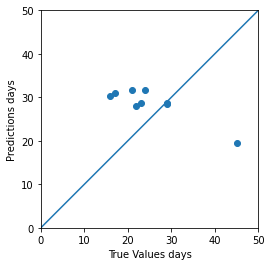

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values days')
plt.ylabel('Predictions days')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

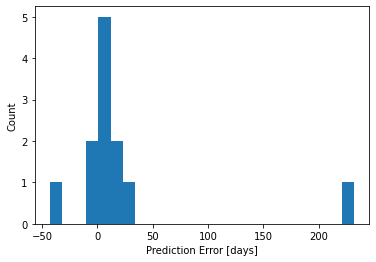

In [ ]:

error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [days]")
_ = plt.ylabel("Count")

In [ ]:
#pred_dataset = growing_df[["total_cases_per_million", "population_density", "median_age", "aged_65_older", "gdp_per_capita","diabetes_prevalence", "hospital_beds_per_100k", "travel", "transport"]]
pred_dataset = growing_df[["total_cases_per_million", "cvd_death_rate", "population_density", "aged_65_older", "gdp_per_capita", "hospital_beds_per_thousand", "travel", "transport", "tests"]]
pred_dataset = pred_dataset.fillna(pred_dataset.mean())
pred_data = norm(pred_dataset)
predictions = model.predict(pred_data).flatten()


In [ ]:
predictions

array([28.447315, 33.19131 , 38.60413 , 35.72101 , 54.89842 , 28.549059,
       60.98395 , 33.527195, 39.59174 , 30.632908, 42.221535, 33.71785 ,
       36.40724 , 53.292107, 30.839811, 39.64903 , 32.722794, 47.005615,
       49.038517, 32.964317, 35.33975 , 28.692387, 42.22331 , 33.036476,
       28.08632 , 37.34647 , 18.07143 , 34.499317, 44.60055 , 37.387016,
       29.625496, 31.507412, 62.46421 , 33.961834, 30.42878 , 32.89905 ,
       27.330736, 35.24634 , 30.088112, 18.368383, 42.538944, 43.850033,
       36.635445, 43.01498 , 28.27231 ], dtype=float32)

In [ ]:
df_1 = pd.DataFrame() 
df_1['days'] = pd.Series(predictions)
growing_df = growing_df.reset_index().reset_index()
df_1 = df_1.fillna(50)
df_1 = df_1.reset_index()

In [ ]:
df_2 = pd.merge(growing_df,df_1, how= "outer", left_on="level_0", right_on ="index")
growing_start.columns =["index"]
growing_start = growing_start.reset_index()
df_3 = pd.merge(df_2, growing_start, how = "left", left_on= "location", right_on= "level_0")
df_3["pred_peak_date"] = ""
for i in df_3.index:
  df_3.loc[i, "pred_peak_date"] = pd.to_datetime(df_3.loc[i, "index"]) + timedelta(int(round(df_3.loc[i, "days"])))

In [ ]:
df_4 = df_3.sort_values("pred_peak_date")


In [ ]:
px.scatter(x=df_4["pred_peak_date", ])

NameError: ignored

In [ ]:
df_4.tail(30)

,level_0_x,index_x,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,Entity_x,travel,Entity_y,transport,tests,index_y,days,level_0_y,index,pred_peak_date
3,3,12,AZE,Asia,Azerbaijan,2020-07-05,19801.0,534.0,241.0,6.0,1952.920,52.667,23.769,0.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.013918e+07,119.309,32.4,6.018,3.871,15847.419,NaN,559.812,7.11,0.3,42.5,83.241,4.70,73.00,Azerbaijan,4.0,Azerbaijan,2.0,NaN,3,54.105896,Azerbaijan,2020-04-12,2020-06-05 00:00:00
7,7,27,BRA,South America,Brazil,2020-07-05,1577004.0,37923.0,64265.0,1091.0,7419.121,178.411,302.339,5.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,Brazil,4.0,Brazil,2.0,NaN,7,53.671051,Brazil,2020-04-13,2020-06-06 00:00:00
37,37,144,OMN,Asia,Oman,2020-07-05,45106.0,1177.0,203.0,10.0,8832.845,230.485,39.752,1.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.106622e+06,14.980,30.7,2.355,1.530,37960.709,NaN,266.342,12.61,0.5,15.6,97.400,1.60,77.86,Oman,4.0,Oman,2.0,NaN,37,55.707081,Oman,2020-04-12,2020-06-07 00:00:00
1,1,2,DZA,Africa,Algeria,2020-07-05,15500.0,430.0,946.0,9.0,353.469,9.806,21.573,0.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,Algeria,4.0,Algeria,0.0,NaN,1,33.801819,Algeria,2020-05-04,2020-06-07 00:00:00
29,29,106,KGZ,Asia,Kyrgyzstan,2020-07-05,7377.0,283.0,88.0,10.0,1130.715,43.377,13.488,1.533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.524191e+06,32.333,26.3,4.489,2.882,3393.474,1.4,436.362,7.11,3.6,50.5,89.220,4.50,71.45,Kyrgyzstan,3.0,Kyrgyzstan,2.0,NaN,29,44.099953,Kyrgyzstan,2020-04-24,2020-06-07 00:00:00
27,27,99,JPN,Asia,Japan,2020-07-05,19522.0,240.0,977.0,0.0,154.353,1.898,7.725,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.264765e+08,347.778,48.2,27.049,18.493,39002.223,NaN,79.370,5.72,11.2,33.7,NaN,13.05,84.63,Japan,3.0,Japan,0.0,0.028029,27,43.779991,Japan,2020-04-25,2020-06-08 00:00:00
39,39,146,PSE,Asia,Palestine,2020-07-05,4250.0,561.0,16.0,1.0,833.102,109.969,3.136,0.196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.101416e+06,778.202,20.4,3.043,1.726,4449.898,1.0,265.910,10.59,NaN,NaN,NaN,NaN,74.05,Palestine,4.0,Palestine,2.0,NaN,39,36.564278,Palestine,2020-05-02,2020-06-08 00:00:00
2,2,7,ARG,South America,Argentina,2020-07-05,72773.0,0.0,1453.0,16.0,1610.173,0.000,32.149,0.354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.519578e+07,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,Argentina,4.0,Argentina,2.0,0.095141,2,36.711704,Argentina,2020-05-03,2020-06-09 00:00:00
17,17,59,SLV,North America,El Salvador,2020-07-05,7507.0,240.0,210.0,0.0,1157.380,37.002,32.376,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.486201e+06,307.811,27.6,8.273,5.417,7292.458,2.2,167.295,8.87,2.5,18.8,90.650,1.30,73.32,El Salvador,4.0,El Salvador,2.0,0.302438,17,41.763275,El Salvador,2020-05-07,2020-06-18 00:00:00
5,5,23,BOL,South America,Bolivia,2020-07-05,38071.0,1253.0,1378.0,58.0,3261.450,107.341,118.050,4.969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.167303e+07,10.202,25.4,6.704,4.393,6885.829,7.1,204.299,6.89,NaN,NaN,25.383,1.10,71.51,Bolivia,4.0,Bolivia,2.0,0.062269,5,48.075645,Bolivia,2020-05-02,2020-06-19 00:00:00


In [ ]:
px.scatter(df_4, x = 'continent', y ='pred_peak_date', hover_name="location")

In [ ]:
df_4.mean(axis=0)

level_0_x                          1.650000e+01
index_x                            9.344118e+01
total_cases                        5.136546e+05
new_cases                          8.720647e+03
total_deaths                       2.353853e+04
new_deaths                         1.567941e+02
total_cases_per_million            1.525658e+03
new_cases_per_million              4.012712e+01
total_deaths_per_million           5.407041e+01
new_deaths_per_million             7.562059e-01
total_tests                                 NaN
new_tests                                   NaN
total_tests_per_thousand                    NaN
new_tests_per_thousand                      NaN
new_tests_smoothed                          NaN
new_tests_smoothed_per_thousand             NaN
tests_units                                 NaN
stringency_index                            NaN
population                         3.581917e+08
population_density                 1.356072e+02
median_age                         2.851

In [ ]:
dataset.mean(axis=0)


total_cases_per_million        3146.880700
cvd_death_rate                  241.367253
population_density              270.088063
aged_65_older                    10.613127
gdp_per_capita                27005.833615
hospital_beds_per_thousand        3.671014
travel                            3.000000
transport                         0.680000
tests                             0.690046
days_to_peak                     37.962500
dtype: float64

In [ ]:
df_4.to_excel("growing_countries.xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')